# Испит по Основи на Вештачката Интелигенција - 2/2

**Датум**: 18.01.2023

## 2. Бело вино

Разгледуваме множество податоци за бело вино. Целта е да умееме да разликуваме лошо, добро и одлично вино, имајќи го предвид хранливиот состав на производот. Податоците со кои располагаме се дадени во табелата подолу.

In [89]:
import pandas as pd

In [90]:
df = pd.read_csv('winequality-white.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,добро
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,добро
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,добро
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,добро
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,добро
...,...,...,...,...,...,...,...,...,...,...,...,...
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,добро
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,добро
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,добро
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,лошо


In [91]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,6.855364,0.278252,0.334213,6.394371,0.045783,35.310584,138.374234,0.994030,3.188269,0.489916,10.513952
std,0.843879,0.100828,0.121048,5.072341,0.021851,17.008620,42.505669,0.002990,0.151016,0.114134,1.230380
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993745,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


### Задача 2.1
**(5 поени)** Објаснете на кој начин ни помага функцијата за ентропија кај дрвата за одлучување.

* Entropijata se koristi za odreduvanje na informaciska pridobivka
    * se odreduva koja podelba ni dava najgolema informaciska pridobivka, t.e. koja podelba ke e optimalna, i vo sledniot cekor drvoto se deli po taa optimalna podelba.
    * Informaciskata pridobivka e razlika pomegu entropijata posle podelbata i entropijata na podatocnoto mnozestvo pred podelbata.

### Задача 2.2
**(5 поени) (код)** Поделете го податочното множество на два дела. Поголемиот дел нека е 70% и ќе служи за тренирање, а помалиот дел од 30% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df[['quality']]

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.3)

### Задача 2.3
**(5 поени) (код)** Исцртајте ги на график вината така што на x оската ќе биде ph вредноста, на y оската ќе биде алкохолот, а квалитетот на вината ќе биде претставен со боја или симбол.

**Совет**: За помош може да го искористите третиот пример `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

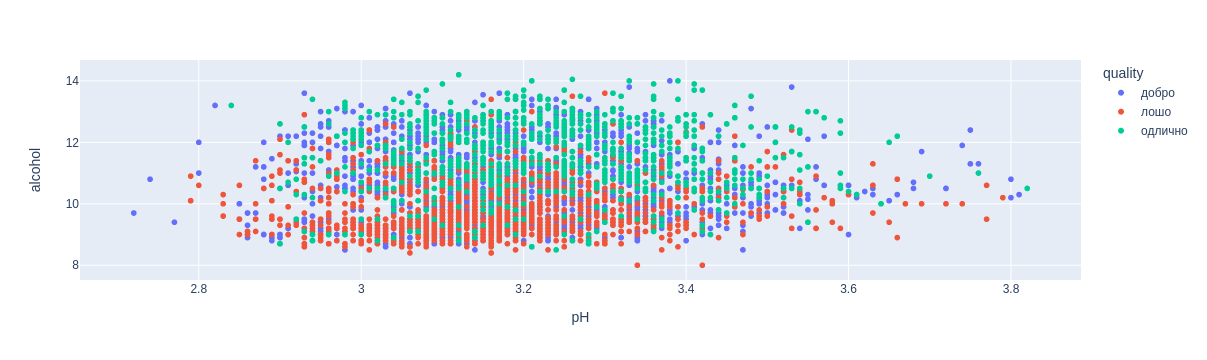

In [95]:
import plotly.express as px
fig = px.scatter(df, x="pH", y="alcohol", color="quality",)
fig.show()

### Задача 2.4
**(5 поени) (код)** Користејќи ја библиотеката `sklearn`,  вчитајте класификатор - дрво за одлучување, претставен преку класата `DecisionTreeClassifier`, а потоа вметнете ги податоците за тренирање од вториот чекор за да ја истренирате мрежата.

- [Пример за дрва за одлучување од sklearn](https://scikit-learn.org/stable/modules/tree.html)
- [Документација за Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [96]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Задача 2.5
**(10 поени) (код)** Пресметајте ја прецизноста на алгоритамот за податоците кои тој ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на алгоритамот за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [97]:
print('Accuracy score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy score on test data:  0.6317222600408441
Accuracy score on train data:  1.0


### Задача 2.6
**(5 поени) (код)** Кои вина алгоритамот успева да ги распознава подобро, оние со висок процент на алкохол (над 10.5%), или оние со низок процент на  алкохол (под 10.5%)?

In [98]:
df['alcohol_over_10_5'] = df['alcohol'] > 10.5
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_over_10_5
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,добро,False
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,добро,False
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,добро,False
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,добро,False
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,добро,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,добро,False
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,добро,True
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,добро,True
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,лошо,False


In [99]:
# za alcohol_over_10_5
df_over_10_5 = df.query('alcohol_over_10_5 == True')
x = df_over_10_5[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df_over_10_5[['quality']]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.3)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy Score on test data:  0.8674884437596302
Accuracy Score on train data:  0.8756613756613757


In [101]:
# za alcohol_under_10_5
df_under_10_5 = df.query('alcohol_over_10_5 == False')
x = df_under_10_5[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df_under_10_5[['quality']]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.3)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy Score on test data:  0.9073170731707317
Accuracy Score on train data:  0.9001568217459488


* sleduva deka malku podobra preciznost ima vo slucajot so vinata koi imaat nizok procent na alkoholot

### Задача 2.7
**(5 поени)** Зошто за алгоритамот ID3 за градење на дрво се вели дека е алчен алгоритам?

* ID3 algoritmot e alcen bidejki drvoto za odlucuvanje go deli na alcen nacin
    * toa znaci deka so sekoja iteracija, algoritmot alcno ja bara **optimalnata podelba** (onaa koja ke dovede do najgolema informaciska pridobivka)

### Задача 2.8
**(5 поени)** Колку се квалитетни вината од податочното множество од датотеката `winequality-white-test.csv`?

In [103]:
df = pd.read_csv('winequality-white-test.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6
1,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4
2,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8
3,6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8


In [104]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
clf.predict(x)

array(['лошо', 'лошо', 'одлично', 'лошо'], dtype=object)

* algoritmot predviduva dela vinoto so indeks 2 e odlicno, a ostanatite 3 se losi

### Задача 2.9
**(10 поени)** Исцртајте го дрвото, до длабочина 3!

In [105]:
df = pd.read_csv('winequality-white.csv')
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df[['quality']]

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x, y)

In [106]:
# ne mi rabotese ova bidejki ne mozev da instaliram matplotlib
from sklearn import tree
tree.plot_tree(clf)

ModuleNotFoundError: No module named 'matplotlib'

In [107]:
from sklearn.tree import export_text
r = export_text(clf, max_depth=3)
print(r)

|--- feature_10 <= 10.85
|   |--- feature_1 <= 0.25
|   |   |--- feature_1 <= 0.21
|   |   |   |--- feature_7 <= 1.00
|   |   |   |   |--- truncated branch of depth 19
|   |   |   |--- feature_7 >  1.00
|   |   |   |   |--- truncated branch of depth 10
|   |   |--- feature_1 >  0.21
|   |   |   |--- feature_10 <= 9.78
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- feature_10 >  9.78
|   |   |   |   |--- truncated branch of depth 19
|   |--- feature_1 >  0.25
|   |   |--- feature_10 <= 9.85
|   |   |   |--- feature_1 <= 0.30
|   |   |   |   |--- truncated branch of depth 13
|   |   |   |--- feature_1 >  0.30
|   |   |   |   |--- truncated branch of depth 16
|   |   |--- feature_10 >  9.85
|   |   |   |--- feature_5 <= 20.50
|   |   |   |   |--- truncated branch of depth 12
|   |   |   |--- feature_5 >  20.50
|   |   |   |   |--- truncated branch of depth 15
|--- feature_10 >  10.85
|   |--- feature_10 <= 12.55
|   |   |--- feature_5 <= 11.50
|   |   |   |--- feature_